In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
import csv

%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437519 entries, 0 to 9437518
Data columns (total 2 columns):
source_node         int64
destination_node    int64
dtypes: int64(2)
memory usage: 144.0 MB


In [3]:
# checking for null values

df.isnull().sum()

source_node         0
destination_node    0
dtype: int64

In [4]:
# checking for duplicate rows and dropping them

df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9437519 entries, 0 to 9437518
Data columns (total 2 columns):
source_node         int64
destination_node    int64
dtypes: int64(2)
memory usage: 216.0 MB


In [5]:
# cleaned traning data is stored in a different CSV

df.to_csv("train_clean.csv", header = False, index = False)

In [6]:
# graph info

g = nx.read_edgelist("train_clean.csv",delimiter=',',create_using=nx.DiGraph(),nodetype=int)
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


In [7]:
# storing small sample of the dataset

pd.read_csv("train_clean.csv", nrows=50).to_csv("train_sample.csv",header=False,index=False)

subgraph = nx.read_edgelist("train_sample.csv", delimiter=',', create_using=nx.DiGraph(), nodetype=int)

Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


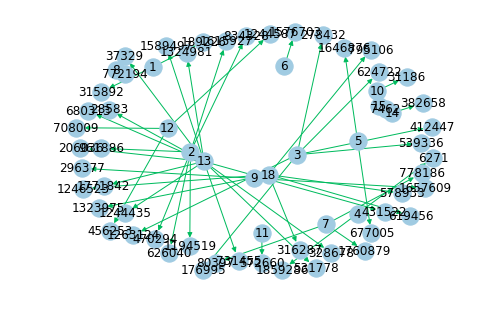

In [8]:
# visualizing the subgraph

pos=nx.spring_layout(subgraph)
nx.draw(subgraph,pos,node_color='#A0CBE2',edge_color='#00bb5e',width=1,edge_cmap=plt.cm.Blues,with_labels=True)
plt.savefig("graph_sample.pdf")
print(nx.info(subgraph))

# Exploratory data analysis

In [9]:
# No of Unique persons 

print("The number of unique persons: ",len(g.nodes()))

The number of unique persons:  1862220


## indegree analysis

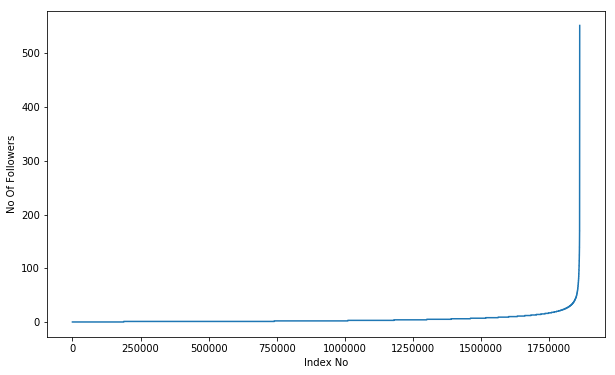

In [10]:
indegree = list(dict(g.in_degree()).values())
indegree.sort()
plt.figure(figsize=(10,6))
plt.plot(indegree)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

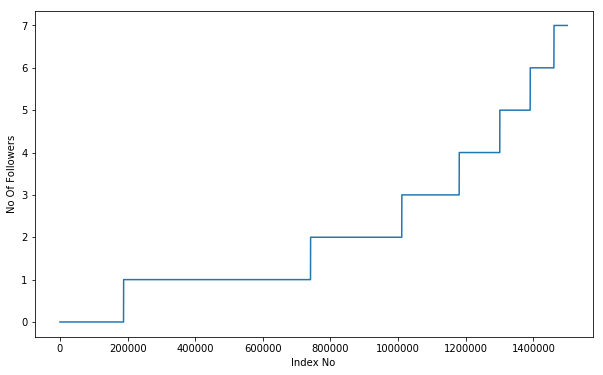

In [11]:
plt.figure(figsize=(10,6))
plt.plot(indegree[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

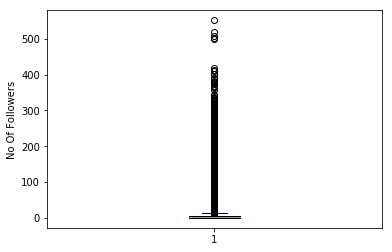

In [12]:
plt.boxplot(indegree)
plt.ylabel('No Of Followers')
plt.show()

In [13]:
# 90-100 percentile

for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(indegree,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 552.0


In [14]:
# 99-100 percentile

for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(indegree,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 44.0
99.3 percentile value is 47.0
99.4 percentile value is 50.0
99.5 percentile value is 55.0
99.6 percentile value is 61.0
99.7 percentile value is 70.0
99.8 percentile value is 84.0
99.9 percentile value is 112.0
100.0 percentile value is 552.0


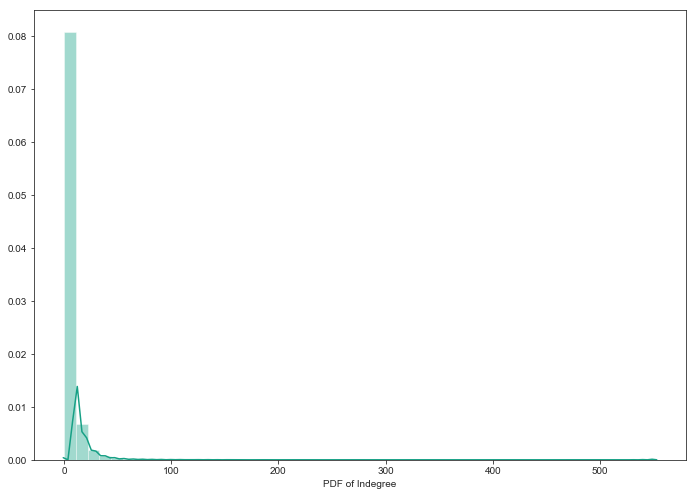

In [15]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(indegree, color='#16A085')
plt.xlabel('PDF of Indegree')
plt.show()

## outdegree analysis

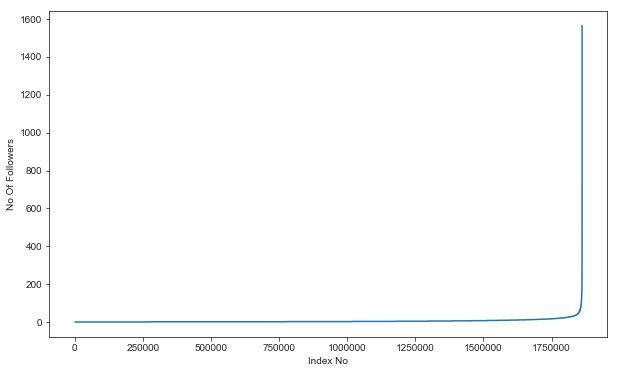

In [16]:
outdegree = list(dict(g.out_degree()).values())
outdegree.sort()
plt.figure(figsize=(10,6))
plt.plot(outdegree)
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

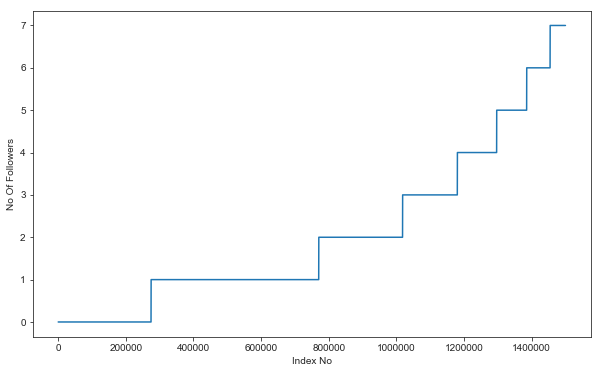

In [17]:
plt.figure(figsize=(10,6))
plt.plot(outdegree[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of Followers')
plt.show()

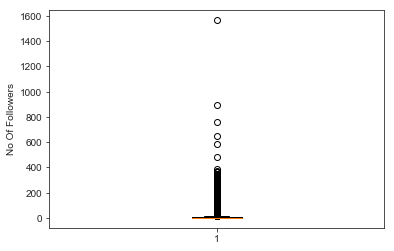

In [18]:
plt.boxplot(outdegree)
plt.ylabel('No Of Followers')
plt.show()

In [19]:
# 90-100 percentile

for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(outdegree,90+i))

90 percentile value is 12.0
91 percentile value is 13.0
92 percentile value is 14.0
93 percentile value is 15.0
94 percentile value is 17.0
95 percentile value is 19.0
96 percentile value is 21.0
97 percentile value is 24.0
98 percentile value is 29.0
99 percentile value is 40.0
100 percentile value is 1566.0


In [20]:
# 99-100 percentile

for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(outdegree,99+(i/100)))

99.1 percentile value is 42.0
99.2 percentile value is 45.0
99.3 percentile value is 48.0
99.4 percentile value is 52.0
99.5 percentile value is 56.0
99.6 percentile value is 63.0
99.7 percentile value is 73.0
99.8 percentile value is 90.0
99.9 percentile value is 123.0
100.0 percentile value is 1566.0


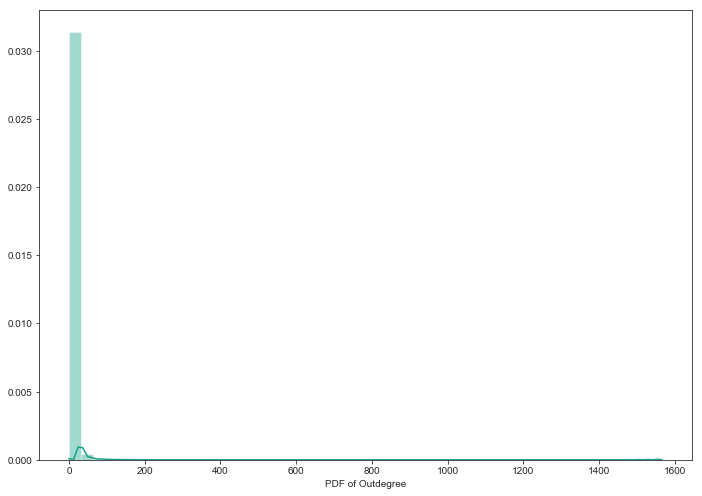

In [21]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(outdegree, color='#16A085')
plt.xlabel('PDF of Outdegree')
plt.show()

In [22]:
print('No of persons those are not following anyone are' ,sum(np.array(outdegree)==0),'and % is',
                                sum(np.array(outdegree)==0)*100/len(outdegree) )

No of persons those are not following anyone are 274512 and % is 14.741115442858524


In [23]:
print('No of persons having zero followers are' ,sum(np.array(indegree)==0),'and % is',
                                sum(np.array(indegree)==0)*100/len(indegree) )

No of persons having zero followers are 188043 and % is 10.097786512871734


In [24]:
count=0
for i in g.nodes():
    if len(list(g.predecessors(i)))==0 :
        if len(list(g.successors(i)))==0:
            count+=1
print('No of persons those are not not following anyone and also not having any followers are',count)

No of persons those are not not following anyone and also not having any followers are 0


## combining both indegree and outdegree

In [25]:
dict_in = dict(g.in_degree())
dict_out = dict(g.out_degree())
d = Counter(dict_in) + Counter(dict_out)
in_out_degree = list(d.values())

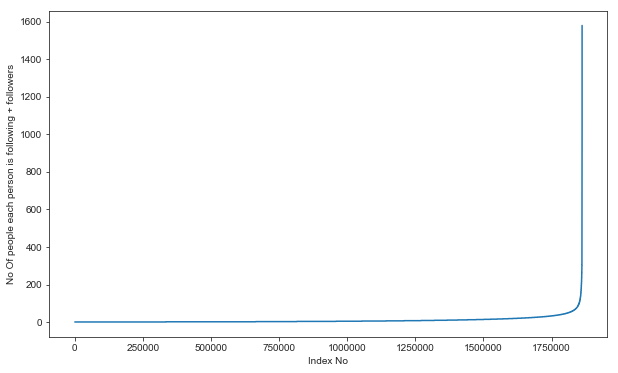

In [26]:
in_out_degree.sort()
plt.figure(figsize=(10,6))
plt.plot(in_out_degree)
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

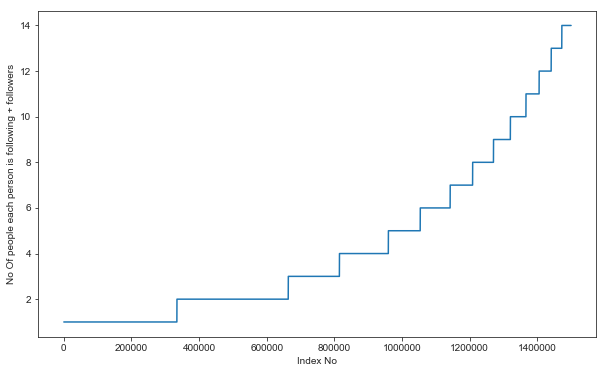

In [27]:
plt.figure(figsize=(10,6))
plt.plot(in_out_degree[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [28]:
### 90-100 percentile

for i in range(0,11):
    print(90+i,'percentile value is',np.percentile(in_out_degree,90+i))

90 percentile value is 24.0
91 percentile value is 26.0
92 percentile value is 28.0
93 percentile value is 31.0
94 percentile value is 33.0
95 percentile value is 37.0
96 percentile value is 41.0
97 percentile value is 48.0
98 percentile value is 58.0
99 percentile value is 79.0
100 percentile value is 1579.0


In [29]:
### 99-100 percentile

for i in range(10,110,10):
    print(99+(i/100),'percentile value is',np.percentile(in_out_degree,99+(i/100)))

99.1 percentile value is 83.0
99.2 percentile value is 87.0
99.3 percentile value is 93.0
99.4 percentile value is 99.0
99.5 percentile value is 108.0
99.6 percentile value is 120.0
99.7 percentile value is 138.0
99.8 percentile value is 168.0
99.9 percentile value is 221.0
100.0 percentile value is 1579.0


In [30]:
print('Min of no of followers + following is',min(in_out_degree))
print(sum(np.array(in_out_degree) == min(in_out_degree)),' persons having minimum no of followers + following')

Min of no of followers + following is 1
334291  persons having minimum no of followers + following


In [31]:
print('Min of no of followers + following is',max(in_out_degree))
print(sum(np.array(in_out_degree) == max(in_out_degree)),' persons having minimum no of followers + following')

Min of no of followers + following is 1579
1  persons having minimum no of followers + following


In [32]:
print('No of persons having followers + following less than 10 are',sum(np.array(in_out_degree)<10))

No of persons having followers + following less than 10 are 1320326


# Converting the problem to a binary classification task

In [33]:
r = csv.reader(open('train_clean.csv','r'))
edges = dict()
for edge in r:
    edges[(edge[0], edge[1])] = 1

In [34]:
negative_edges = set([])

In [35]:
while (len(negative_edges)<9437519):
    a = np.random.randint(1, 1862220)
    b = np.random.randint(1, 1862220)
    tmp = edges.get((a,b),-1)
    if tmp == -1 and a!=b:
        try:
            if (nx.shortest_path_length(g,source=a,target=b) > 2): 
                negative_edges.add((a,b))
            else:
                continue     
        except:
                negative_edges.add((a,b))
    else:
        continue        

In [36]:
df_n = pd.DataFrame(negative_edges)

In [37]:
print("Number of positive edges: ", df.shape[0])
print("Number of negative edges: ", df_n.shape[0])

Number of positive edges:  9437519
Number of negative edges:  9437519


In [38]:
X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df,np.ones(len(df)),test_size=0.2, random_state = 101)
X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_n,np.zeros(len(df_n)),test_size=0.2, random_state = 101)

In [39]:
X_train_pos.to_csv('train_pos.csv',header=False, index=False)
X_test_pos.to_csv('test_pos.csv',header=False, index=False)
X_train_neg.to_csv('train_neg.csv',header=False, index=False)
X_test_neg.to_csv('test_neg.csv',header=False, index=False)

In [40]:
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)

In [41]:
y_train = np.concatenate((y_train_pos, y_train_neg))
y_test = np.concatenate((y_test_pos, y_test_neg))

In [42]:
print("Shape of traning data: ", X_train.shape)
print("Shape of test data: ", X_test.shape)
print("Shape of y_train data: ", y_train.shape)
print("Shape of y_test data: ", y_test.shape)

Shape of traning data:  (15100030, 2)
Shape of test data:  (3775008, 2)
Shape of y_train data:  (15100030,)
Shape of y_test data:  (3775008,)


In [43]:
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(X_test)

In [44]:
df_train.to_csv('train_new.csv',header=False, index=False)
df_test.to_csv('test_new.csv',header=False, index=False)

In [45]:
df_train_y = pd.DataFrame(y_train)
df_test_y = pd.DataFrame(y_test)

In [46]:
df_train_y.to_csv('train_y.csv',header=False, index=False)
df_test_y.to_csv('test_y.csv',header=False, index=False)